In [1]:
# Nama : Irsyad Muhamad Firdaus
# Email : irsyad.muhf@gmail.com
# ID Dicoding : irsydmuhf

In [2]:
# Menentukan pertanyaan bisnis
# 1. Pada jam berapa penyewa paling banyak menyewa sepeda pada hari tertentu?
# 2. Bagaimana pengaruh musim(season) terhadap tren penyewa sepeda?

In [3]:
# IMPORT SEMUA LIBRARY YANG KITA BUTUHKAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# DATA WRANGLING

In [5]:
# DATA GATHERING
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# Insight:
# Tabel day_df dan hour_df berisi mengenai jumlah penyewa sepeda pada rentang waktu tertentu dan dalam kondisi cuaca tertentu.
# Tabel day_df berisi tren harian, sedangkan hour_df adalah tren dalam satu hari dilihat dari adanya kolom hr(hour)

In [8]:
# DATA ASSESING

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Pada info tabel day_df di atas kita tidak melihat adanya missing value
# Dapat kita lihat juga tidak ada duplikasi pada tabel tersebut
# Tetapi kita melihat adanya anomali tipedata untuk dteday

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
# Pada info tabel hour_df di atas kita tidak melihat adanya missing value
# Tidak ditemukannya duplikasi data pada tabel hour_df
# Tetapi kita melihat adanya anomali tipedata untuk kolom dteday

In [15]:
# DATA CLEANING

In [16]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
# Code di atas untuk mengubaj tipedata dteday yang tadinya objet menjadi datetime

In [18]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
# Code di atas untuk mengubaj tipedata dteday yang tadinya objet menjadi datetime

In [21]:
# EXPLORATORY DATA ANALYSIS (EDA)

In [23]:
all_df = pd.merge(hour_df, day_df, on="dteday", suffixes=("_hour", "_day"))
all_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [24]:
# Karena ukuran dataframe terlalu besar dan banyak kolom yang mungkin tidak relevan dengan pertanyaan bisnis, maka beberapa kolom akan saya drop

In [26]:
all_df = all_df.drop(columns=["instant_hour", "instant_day", "season_hour", 
                                    "temp_day", "atemp_day", "hum_day", 
                                    "windspeed_day", "holiday_day", "weekday_day", 
                                    "workingday_day", "weathersit_day", 
                                    "casual_day", "registered_day", "cnt_day"])

KeyError: "['instant_hour', 'instant_day', 'season_hour', 'temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'holiday_day', 'weekday_day', 'workingday_day', 'weathersit_day', 'casual_day', 'registered_day', 'cnt_day'] not found in axis"

In [30]:
all_df.head(100)

,dteday,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,season_day,yr_day,mnth_day
0,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,0,1
1,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,0,1
2,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,0,1
3,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,0,1
4,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05,0,1,4,0,3,1,1,0.24,0.2273,0.48,0.2239,0,2,2,1,0,1
96,2011-01-05,0,1,5,0,3,1,1,0.22,0.2273,0.47,0.1642,0,3,3,1,0,1
97,2011-01-05,0,1,6,0,3,1,1,0.20,0.1970,0.47,0.2239,0,33,33,1,0,1
98,2011-01-05,0,1,7,0,3,1,1,0.18,0.1818,0.43,0.1940,1,87,88,1,0,1


In [49]:
# Menjawab pertanyaan pertama dengan mengelompokkan berdasarkan jam(hr) dan menghitung rata-rata penyewa
all_df.groupby("hr")["cnt_hour"].mean().sort_values(ascending=False)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt_hour, dtype: float64

In [36]:
# Menjawab pertanyaan kedua dengan menghitung rata-rata penyewaan sepeda per jam pada tiap musim
all_df.groupby("season_day")["cnt_hour"].mean()

season_day
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt_hour, dtype: float64

In [39]:
# INSIGHT EXPLORATORY DATA ANALYSIS
# Jawaban Pertanyaan 1: Rata-rata penyewaan tertinggi teradapat di sore hari sekitar jam 5 yaitu sekitar 461 penyewa per jam, kemudian jam 6 sore dengan 425 penyewa, kemudian jam 8 pagi dengan 359 penyewa.
# Jawaban Pertanyaan 2: Musim Gugur memiliki rata-rata pengguna sepeda tertinggi, sedangkan Musim Semi memiliki rata-rata terendah.
# Dari mana kita bisa melihat angka 1, 2, 3, dan 4 mewakili musim apa? Selain dari siklus musim berdasarkan tanggal, pemilik data juga menyertakan keterangan terseut di file README


In [40]:
# DATA VISUALIZATION

In [42]:
# Visualisasi untuk pertanyaan nomor 1
hourly_trend_df = all_df.groupby("hr")["cnt_hour"].mean()
hourly_trend_df.sort_values(ascending=False)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt_hour, dtype: float64

In [43]:
# Terlihat bahwa pada jam 17 atau 5 sore memiliki rata-rata penyewaan tertinggi
# Untuk lebih mempermudah, kita akan memvisualisasikan data tersebut

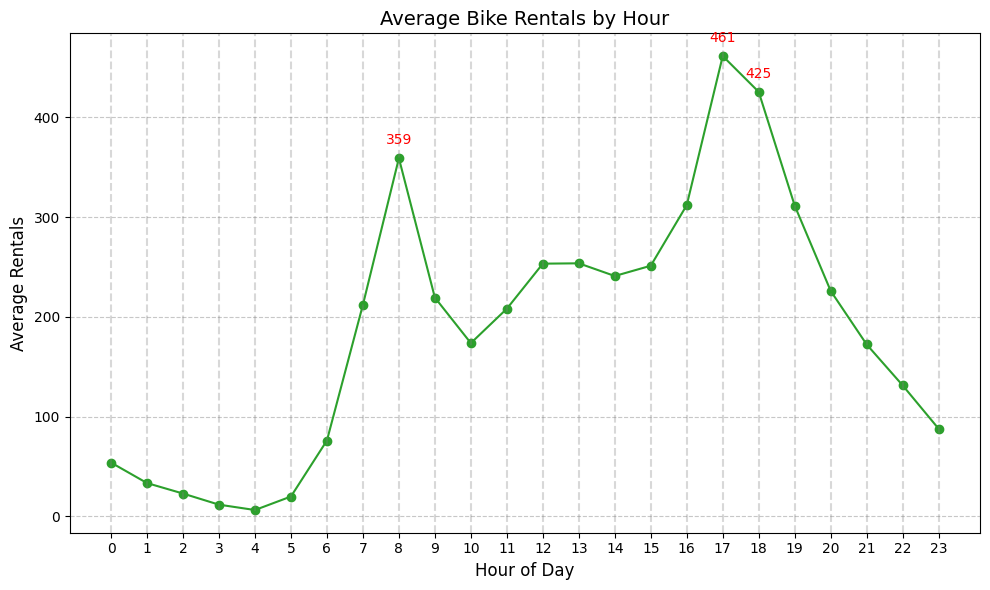

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_trend_df.index, hourly_trend_df, marker="o", linestyle="-", color="#2ca02c")

for hour in hourly_trend_df.index:
    plt.axvline(x=hour, color='gray', linestyle='--', alpha=0.3)

plt.title("Average Bike Rentals by Hour", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.xticks(ticks=range(0, 24), fontsize=10)  # Show all hours
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

peak_hours = [17, 18, 8]
for hour in peak_hours:
    plt.annotate(f"{int(hourly_trend_df[hour])}", 
                 (hour, hourly_trend_df[hour]), 
                 textcoords="offset points", 
                 xytext=(0, 10), ha='center', fontsize=10, color="red")

plt.tight_layout()
plt.show()


In [58]:
# Terlihat bahwa pada jam 17 atau 5 sore memiliki rata-rata penyewaan tertinggi
# Penambahan garis vertikal pada tiap jam untuk mempermudah penyampaian informasi visual.

In [52]:
# Visualisasi untuk pertanyaan nomor 2
seasonal_trend_df = all_df.groupby("season_day")["cnt_hour"].mean()
seasonal_trend_df.sort_values(ascending=False)

season_day
3    236.016237
2    208.344069
4    198.868856
1    111.114569
Name: cnt_hour, dtype: float64

In [ ]:
# Terlihat bahwa musim dengan kode 3 atau Gugur memiliki jumlah rata rata penyewa tertinggi dibandingkan dengan 3 musim lainnya.
# Sedangkan musim dengan kode 1 atau Semi mendapatkan jumlah rata rata penyewa terendah.

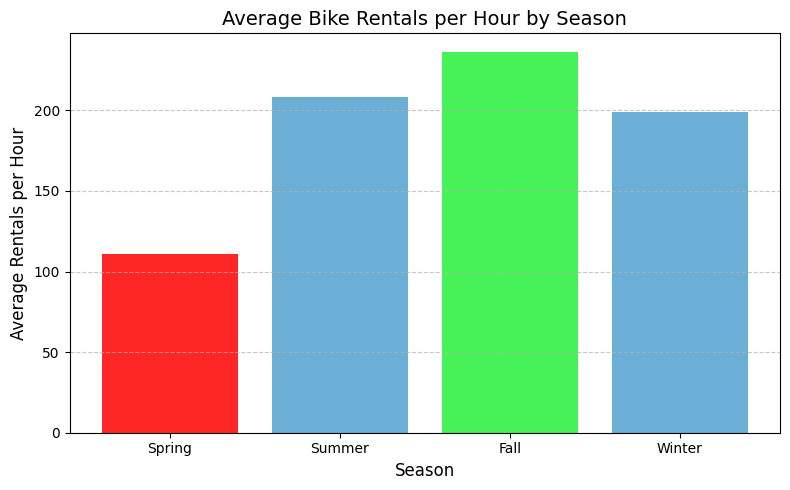

In [57]:
season_labels = ["Spring", "Summer", "Fall", "Winter"]

plt.figure(figsize=(8, 5))
plt.bar(season_labels, seasonal_trend, color=["#ff2626", "#6baed6", "#46f257", "#6baed6"])
plt.title("Average Bike Rentals per Hour by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Rentals per Hour", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


In [59]:
# Terlihat bahwa musim dengan kode 3 atau Gugur memiliki jumlah rata rata penyewa tertinggi dibandingkan dengan 3 musim lainnya.
# Sedangkan musim dengan kode 1 atau Semi mendapatkan jumlah rata rata penyewa terendah.
# Pemilihan warna merah sebagai yang terendah dan warna hijau sebagai yang tertinggi.

In [60]:
# INSIGHT DATA VISUALIZATION
# Penyewaan tertinggi pada jam 17 (5 sore) dan 18 (6 sore) khususnya pada saat orang pulang kerja, dan pada jam 8 pagi pada saat orang berangkat kerja.
# Pengaruh musim terhadap tren penyewaan sepeda ini menunjukkan bahwa cuaca atau faktor lain di musim gugur lebih mendukung aktivitas bersepeda dibanding musim lainnya. 

In [61]:
all_df.to_csv("all_data.csv", index=False)